In [48]:
import sys
sys.path.insert(0, "../")

In [49]:
import nsp
import numpy as np
import torch
import utils
import utils.optm as optm
import utils.lossfunc as lf
from importlib import reload

reload(nsp)

<module 'nsp' from '/home/user/project/python/nsp/test/../nsp/__init__.py'>

In [50]:
# %%time
# for _ in range(1):
x = np.random.randn(16,16)
x = (x+x.T)/2
x=torch.tensor(x)
loss_l1 = nsp.loss.L1(x, [4, 4])
loss_l2 = nsp.loss.L2(x, [4, 4])
loss_mes = nsp.loss.MES(x, [4, 4])

In [72]:
from nsp.optim import RiemanSGD
from matplotlib import pyplot as plt

t = 0.001
model2 = nsp.model.UnitaryRiemanGenerator(4, dtype=torch.float64)
sgd = RiemanSGD(model2, t)
loss_old = loss_l1(model2.matrix()).item()
loss_l1(model2.matrix()).backward()
S, U = sgd._riemannian_grad(model2._params)
W = model2.matrix().data
S = S/torch.linalg.norm(S@W)
loss_rieman_dir = loss_l1(torch.matrix_exp(-t*S)@W)

res = []
for _ in range(10000):
    S_ = np.random.randn(4,4)
    S_ = S_ - S_.T
    S_ = torch.Tensor(S_).to(torch.float64)
    S_ = S_/torch.linalg.norm(S_@W)
    loss_random = loss_l1(torch.matrix_exp(-t*S_)@W)
#     res.append((loss_random-loss_old).item())
    res.append((loss_random-loss_rieman_dir).item())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


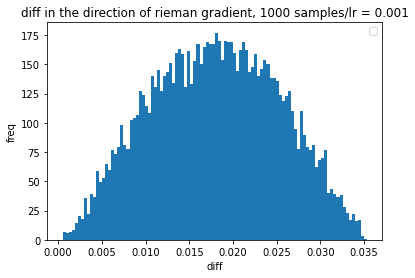

In [73]:
fig, ax = plt.subplots()
ax.hist(res, bins=100)
ax.set_title('diff in the direction of rieman gradient, 1000 samples/lr = 0.001')
ax.set_xlabel('diff')
ax.set_ylabel('freq')
ax.legend()
fig.show()
plt.savefig('rieman_grad_lr=0.001.jpg', dpi=400, bbox_inches="tight")